In [118]:
import matplotlib
matplotlib.rcParams['figure.dpi'] = 200

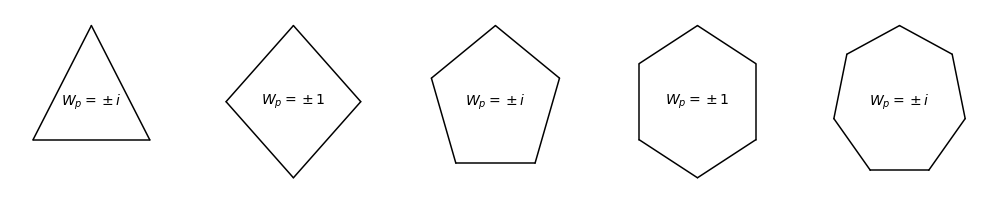

In [3]:
import matplotlib.pyplot as plt
from koala import plotting as pl
from koala import example_graphs as eg

Ns= [3,4,5,6,7]

w = 3.5
f, axes = plt.subplots(ncols = len(Ns), figsize = (w*len(Ns), w))

for n, ax in zip(Ns, axes):
    l = eg.single_plaquette(n)
    pl.plot_edges(l,ax = ax)
    ax.text(0.5,0.5, r"$W_p = \pm i$" if n%2 else r"$W_p = \pm 1$", ha = "center", va = "center", fontsize = 14)
    ax.axis("off")

In [4]:
from dataclasses import dataclass
import numpy as np
import operator
import functools
import itertools as it

def product(iterable): return functools.reduce(operator.mul, iterable, 1)
def factorial(n): return product(range(1,n+1))
def commutator(a,b): return a@b - b@a

def epsilon(*args):
    n = len(args)
    return product(
        product(args[j] - args[i] for j in range(i, n-1))
        // factorial(i) for i in range(n))

@dataclass
class Spin:
    """A spin represented by pauli matrices in the z basis"""
    x = np.array([[0,1],[1,0]])
    y = np.array([[0,-1j],[1j,0]])
    z = np.array([[1,0],[0,-1]])
    index = None
    
    def __getitem__(self, key):
        return np.array([self.x,self.y,self.z])[key]
    
p = Spin()
# Check [sigma_a, sigma_a] = 0
for i in range(3): assert np.allclose(commutator(p[i], p[i]), 0)

# for i, j, k in it.product(range(3), repeat = 3):
#     print((i,j), commutator(p[i], p[j]) - 2 * sum(epsilon(i,j,k) * p[k] for k in range(3)))


[70, 135, 72, 139, 140, 78, 104, 42, 107, 111, 113, 115, 116, 117, 122, 125]


[[], []]

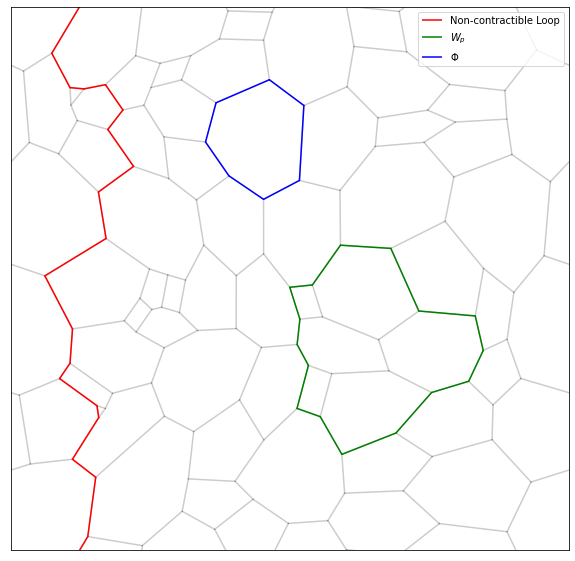

In [26]:
from koala import plotting as pl
from koala import example_graphs as eg
from koala.flux_finder import pathfinding

import functools

rng = np.random.default_rng(seed = 10)
l, coloring, _ = eg.make_amorphous(8, rng = rng)

f, ax = plt.subplots(figsize = (10,10))


# pl.plot_vertex_indices(l, ax = ax)
# pl.plot_edge_indices(l, ax = ax)
# pl.plot_plaquette_indices(l, ax = ax)

vertices, edges = pathfinding.path_between_vertices(l, 24, 53)
vertices, edges2 = pathfinding.path_between_vertices(l, 23, 53)

noncontractible_loop = edges + edges2 + [157,]

plaquettes = [40, 52, 41, 43, 53, 30]
W_p = list(functools.reduce(lambda a,b: a^b, [set(l.plaquettes[i].edges) for i in plaquettes]))
print(W_p)

pl.plot_edges(l, ax = ax, alpha = 0.2)
pl.plot_edges(l, ax = ax, subset = noncontractible_loop, color = "r", label = "Non-contractible Loop")
pl.plot_edges(l, ax = ax, subset = W_p, color = "g", label = "$W_p$")
pl.plot_edges(l, ax = ax, subset = l.plaquettes[49].edges, color = "b", label = "$\Phi$")

ax.legend()
ax.set(xticks = [], yticks = [])

In [319]:
l.plaquettes[0]

Plaquette(vertices=array([57, 58, 17, 18, 60, 14]), edges=array([  0, 184, 136, 141,  73, 180]), directions=array([ 1, -1,  1, -1, -1,  1]), center=array([0.93740921, 0.22612617]), n_sides=6, adjacent_plaquettes=array([ 1,  9, 56, 42, 13, 23]))

<AxesSubplot:>

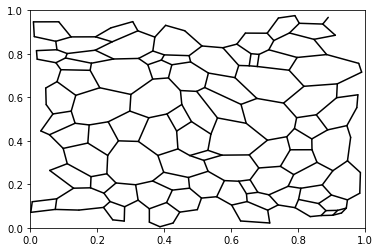

In [273]:
from koala.lattice import INVALID
n_adjacent_plaquettes = 3 - np.sum(l.vertices.adjacent_plaquettes == INVALID, axis = -1)
hanging_verts = np.where(n_adjacent_plaquettes < 1)[0]

bad_edges = set(it.chain(l.vertices.adjacent_edges[i][0] for i in hanging_verts))
good_edges = set(range(l.n_edges)) - bad_edges
good_mask = np.array([i in good_edges for i in range(l.n_edges)])

pl.plot_edges(l, subset = good_mask)

(0.0, 1.0, 0.0, 1.0)

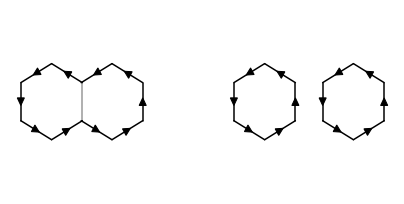

In [83]:
import matplotlib.pyplot as plt
from koala import plotting as pl
from koala import example_graphs as eg

Ns= [3,4,5,6,7]



def transform_lattice(l, translate = np.array([0,0]), scale = 1):
    """
    Return a new lattice with vertex positions p' = (p*scale) + translate
    Does not attempt to deal with periodic boundary conditions
    """
    return Lattice(l.vertices.positions*scale + translate[None, :], l.edges.indices, l.edges.crossing)
    
w = 3.5
f, axes = plt.subplots(ncols = 2, figsize = (w*2, w))

ax = axes[1]
l = transform_lattice(eg.single_plaquette(6), scale = 0.5, translate = np.array([0,0.25]))
pl.plot_edges(l,ax = ax, directions = True, arrow_head_length = 0.04)

l1 = transform_lattice(l, translate = np.array([0.5, 0]))
pl.plot_edges(l1, ax = ax, directions = True, arrow_head_length = 0.04)

ax.axis("off")

ax = axes[0]
l = transform_lattice(eg.single_plaquette(6), scale = 0.5, translate = np.array([0,0.25]))
pl.plot_edges(l,ax = ax, directions = True, arrow_head_length = 0.04, subset = [0,1,2,3,5])
pl.plot_edges(l,ax = ax, subset = [4,], alpha = 0.4)


l1 = transform_lattice(l, translate = np.array([0.34, 0]))
pl.plot_edges(l1, ax = ax, directions = True, arrow_head_length = 0.04, subset = [0,2,3,4,5])
# pl.plot_edge_indices(l1, ax=ax)
ax.axis("off")

[[], [], (0.0, 0.9), (0.48, 0.78)]

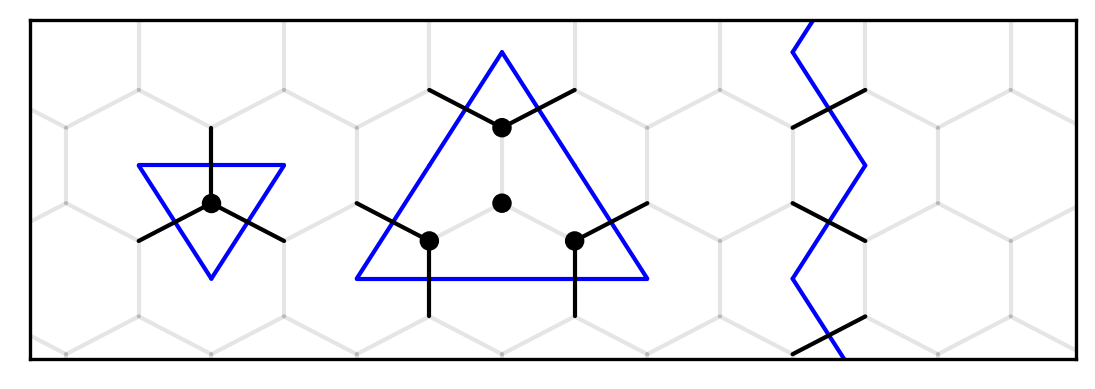

In [390]:
from koala import plotting as pl
from koala import example_graphs as eg
from koala.flux_finder import pathfinding

import functools

w = column_width = 3.375

# rng = np.random.default_rng(seed = 10)
# l, coloring, _ = eg.make_amorphous(8, rng = rng)
l, coloring, _ = eg.make_honeycomb(8)


fig, ax = plt.subplots(nrows=1, ncols=1)
aspect_ratio = 3
fig.set_size_inches(2 * w, 2/3 * w)


# pl.plot_vertex_indices(l, ax = ax)
# pl.plot_edge_indices(l, ax = ax)
# pl.plot_plaquette_indices(l, ax = ax)

single_vertex = 100

subset = l.vertices.adjacent_edges[single_vertex]
pl.plot_dual(l, ax = ax, color = 'blue', subset = subset)
pl.plot_edges(l, ax = ax, color = 'k', subset = subset)
pl.plot_vertices(l, ax = ax, subset = [single_vertex])

pl.plot_edges(l, ax = ax, alpha = 0.1)
# pl.plot_dual(l, ax = ax, color = 'blue', alpha = 0.1)

def multi_set_symmetric_difference(sets):
    return list(functools.reduce(lambda a,b: a^b, [set(s) for s in sets]))

multi_verts = [108, 75, 79, 109]
multi_edges = multi_set_symmetric_difference([l.vertices.adjacent_edges[v] for v in multi_verts])
pl.plot_dual(l, ax = ax, color = 'blue', subset = multi_edges)
pl.plot_edges(l, ax = ax, color = 'k', subset = multi_edges)
pl.plot_vertices(l, ax = ax, subset = multi_verts)

_, edges = pathfinding.path_between_plaquettes(l, 76, 12)
_, edges2 = pathfinding.path_between_plaquettes(l, 75, 12)
edges = edges + edges2 + [112,]

pl.plot_dual(l, ax = ax, color = 'blue', subset = edges)
pl.plot_edges(l, ax = ax, color = 'k', subset = edges)

s = 0.9
t = 0.48
ax.set(xticks = [], yticks = [],
      xlim = [0,s],
       ylim = [t, t+s/aspect_ratio]
      )

Plaquette(vertices=array([147, 146, 149, 150, 151, 200]), edges=array([110, 348, 112, 113, 453, 556]), directions=array([-1,  1, -1,  1, -1,  1]), center=array([0.86538462, 0.34447169]), n_sides=6, adjacent_plaquettes=array([ 73,  74,  76,  77, 102, 100]))


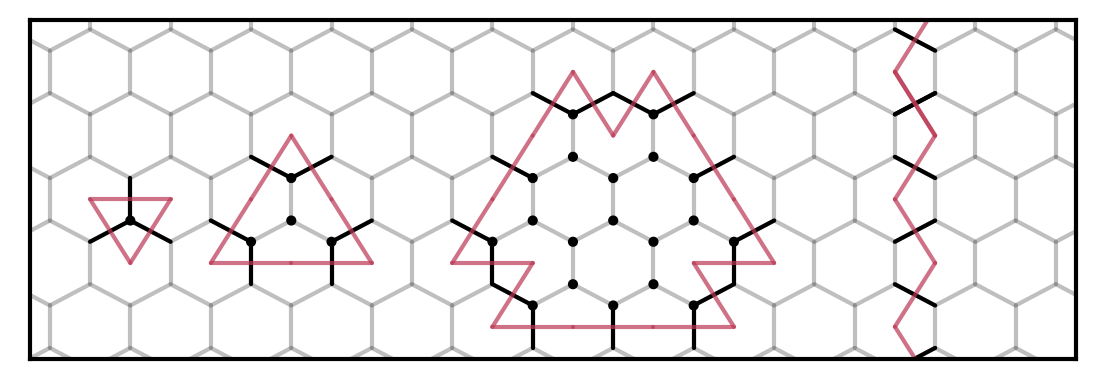

In [426]:
#!/usr/bin/env python3
import matplotlib
from matplotlib.colors import to_rgba, to_hex
from matplotlib import cm
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import numpy as np

from koala import plotting as pl
from koala import phase_diagrams as pd
from koala import flux_finder
from koala import example_graphs as eg
from koala.flux_finder import pathfinding
import pickle
import scipy.stats
from pathlib import Path
import itertools as it

def multi_set_symmetric_difference(sets):
    return list(functools.reduce(lambda a,b: a^b, [set(s) for s in sets]))

def flood_iteration_plaquettes(l, plaquettes):
    return set(plaquettes) | set(it.chain.from_iterable(l.plaquettes[p].adjacent_plaquettes for p in plaquettes))

def flood_iteration_vertices(l, vertices):
    return set(vertices) | set(it.chain.from_iterable(i for v in set(vertices) for i in l.edges.indices[l.vertices.adjacent_edges[v]]))

def flood_vertices(l, vertices, n):
    for _ in range(n): vertices = flood_iteration_vertices(l, vertices)
    return vertices

w = column_width = 3.375
black_line_widths = 1.5

matplotlib.rcParams.update({'font.size': 13, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern']})
matplotlib.rcParams.update({"axes.linewidth": black_line_widths})

line_colors = [to_hex(a) for a in cm.inferno([0.25, 0.5, 0.75])]
rng = np.random.default_rng(242535)
lattice, colouring, ujk = eg.make_honeycomb(13)
    
fig, ax = plt.subplots(nrows=1, ncols=1)
aspect_ratio = 3
fig.set_size_inches(2 * w, 2/aspect_ratio * w)


edges_to_highlight = []
vertices_to_highlight = []

# matplotlib.rcParams.update({'font.size': 10, 'text.usetex': False,})
# pl.plot_vertex_indices(lattice, ax = ax)
# pl.plot_edge_indices(lattice, ax = ax)
# pl.plot_plaquette_indices(lattice, ax = ax)

single_vertex = 56
vertices_to_highlight += [single_vertex, ]
edges_to_highlight += list(lattice.vertices.adjacent_edges[single_vertex])


multi_verts = [64,65,11,15]
vertices_to_highlight += multi_verts
edges_to_highlight +=  multi_set_symmetric_difference([lattice.vertices.adjacent_edges[v] for v in multi_verts])

seed = 80
vertices = flood_vertices(lattice, [seed, ], n = 3)
vertices_to_highlight += vertices
edges_to_highlight +=  multi_set_symmetric_difference([lattice.vertices.adjacent_edges[v] for v in vertices])

ps, edges = pathfinding.path_between_plaquettes(lattice, 75, 22)
# _, edges2 = pathfinding.path_between_plaquettes(lattice, 75, 12)
print(lattice.plaquettes[ps[-1]])
edges_to_highlight += edges + [621,543]

pl.plot_edges(lattice, color = 'grey', alpha = 0.5)
pl.plot_edges(lattice, subset = edges_to_highlight, color = 'k')
pl.plot_dual(lattice, subset = edges_to_highlight, color_scheme = line_colors[1:], alpha = 0.7)
pl.plot_vertices(lattice, subset = vertices_to_highlight, s = 7)

ax.set(xticks = [],
       yticks = [],
      xlim = (0,1),
      ylim = (0,1/aspect_ratio))

[53, 3, 0]
[17, 5, 11, 36, 35]
[58, 43, 14, 6, 54, 50, 48]


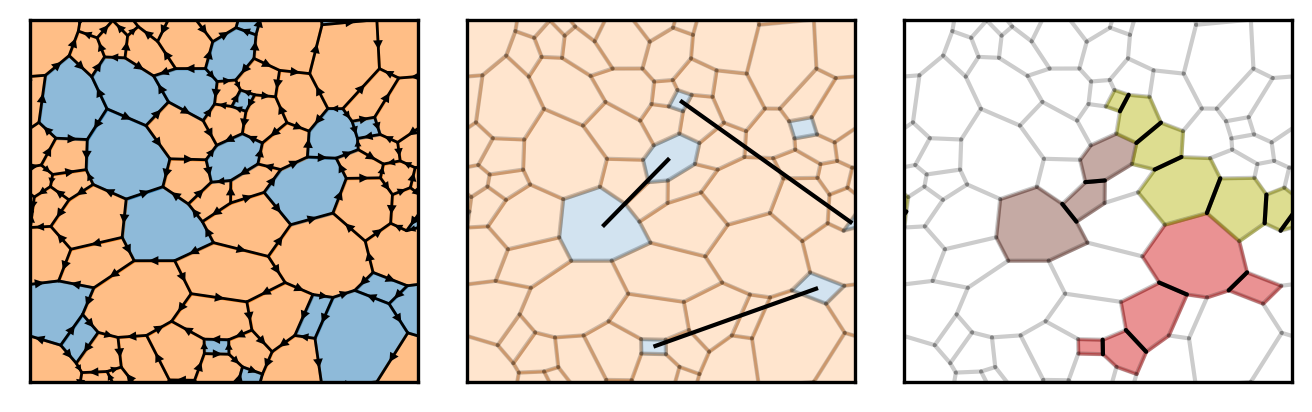

In [254]:
#!/usr/bin/env python3

import matplotlib
from matplotlib.colors import to_rgba, to_hex
from matplotlib import cm
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats
from pathlib import Path

from koala import plotting as pl
from koala import phase_diagrams as pd
from koala import pointsets, voronization, flux_finder, graph_color
from koala import example_graphs as eg

# imports just for this plot
# import custom_voronization as voronization
from scipy.spatial import Voronoi, voronoi_plot_2d

column_width = 3.375
w = 3.375
black_line_widths = 1.2

matplotlib.rcParams.update({'font.size': 13, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern']})
matplotlib.rcParams.update({"axes.linewidth": black_line_widths})

# Modified RGB color scheme
bond_colors = """" 
#e41a1c
#4daf4a
#00639a
""".split()[1:]

line_colors = [to_hex(a) for a in cm.inferno([0.25, 0.5, 0.75])]
grid_style = dict(linewidths = black_line_widths, linestyle = '-', colors = 'k', alpha = 0.2)

cmap = plt.get_cmap("tab10")
color_scheme = cmap([0,1])

from koala.flux_finder.flux_finder import _greedy_plaquette_pairing
from koala.flux_finder.pathfinding import straight_line_length, periodic_straight_line_length
from koala.flux_finder.flux_finder import _flip_adjacent_fluxes

rng = np.random.default_rng(222424252565)
lattice, colouring, gs_ujk = eg.make_amorphous(8, rng = rng)
# random_ujk = rng.choice([+1, -1], size = gs_ujk.shape)
gs_fluxes = flux_finder.fluxes_from_bonds(lattice, gs_ujk)

better_ujk, better_fluxes = _flip_adjacent_fluxes(lattice, gs_ujk.copy(), gs_fluxes.copy())




def panel_a(ax):
    pl.plot_edges(lattice, ax = ax, directions = gs_ujk, linewidths = 1)
    pl.plot_plaquettes(lattice, labels = (gs_fluxes == +1), ax = ax, color_scheme = color_scheme, alpha = 0.5)
    
def panel_b(ax):
    
    def plaquette_metric(l):
        def d(a,b): return straight_line_length(l.plaquettes[a].center, l.plaquettes[b].center)
        return d

    def plot_bad_flux_pairing(l, bonds, fluxes, ax):
        bad_fluxes = np.nonzero(fluxes == -1)[0]
        pairs = _greedy_plaquette_pairing(bad_fluxes, distance_func = plaquette_metric(l))

        fluxes = flux_finder.fluxes_from_bonds(l, bonds)
        plaquette_labels = (fluxes == +1)
        pl.plot_plaquettes(l, plaquette_labels, color_scheme = color_scheme, ax = ax, alpha = 0.2)

        pl.plot_edges(l, alpha = 0.2, ax = ax)

        def pos(i): return l.plaquettes[i].center
        lines = [[pos(a),pos(b)] for a,b in pairs]

        from matplotlib.collections import LineCollection
        lines = LineCollection(lines, color = 'k')
        ax.add_collection(lines)

        return pairs
    
    return plot_bad_flux_pairing(lattice, better_ujk, better_fluxes, ax)

def panel_c(ax, pairs):
    path_kw = dict(heuristic = straight_line_length)
    
    def plot_paths(l, fluxes, pairs, ax):
        # pl.plot_plaquettes(l, fluxes == +1, color_scheme = color_scheme, ax = ax, alpha = 0.1)
        pl.plot_edges(l, alpha=0.2, ax = ax)

        plaquette_paths, edge_paths = zip(*(pathfinding.path_between_plaquettes(l, a, b, **path_kw) for a,b in pairs))

        for plaqs, edges in zip(plaquette_paths, edge_paths):
            print(plaqs)
            color = cmap(rng.integers(10))
            pl.plot_plaquettes(l, subset=plaqs, color_scheme= [color,], ax=ax, alpha = 0.5)
            pl.plot_edges(l, subset=edges, color = 'black', ax=ax)

        return edge_paths
    plot_paths(lattice, fluxes, pairs, ax)
    
fig, axes = plt.subplots(nrows=1, ncols=3)
fig.set_size_inches(2 * w, 2/3 * w)

panel_a(axes[0])
pairs = panel_b(axes[1])
panel_c(axes[2], pairs)
for ax in axes: ax.set(xticks = [], yticks = [])


fig.tight_layout()



In [146]:
flux_finder.find_flux_sector?

Signature:
flux_finder.find_flux_sector(
    l: koala.lattice.Lattice,
    target_flux_sector: numpy.ndarray = None,
    initial_bond_guess: numpy.ndarray = None,
)
Docstring:
Find a bond configuration that produces the given flux sector for the lattice l.

The high level method is:
    1) Figure out which fluxes need to flip using fluxes_to_flip = target_flux_sector / initial_flux_sector
    2) Look for any adjacent -1 fluxes in fluxes_to_flip that can be anhilated by just flipping 1 edge.
    3) Pair the remaining fluxes off into close-ish pairs
    4) Use A* to find a path between each pair.
    5) Flip all the edges along each path.

Where:
A bond configuration is an assignment of +/-1 to each bond.
A flux sector is an assignment of +/-1 to even plaquette and +/-i to odd plaquettes.
File:      ~/git/koala/src/koala/flux_finder/flux_finder.py
Type:      function


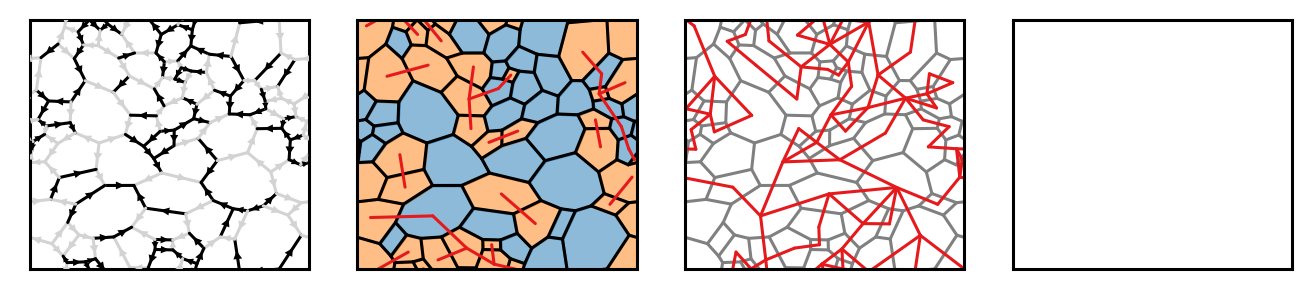

In [167]:
#!/usr/bin/env python3

import matplotlib
from matplotlib.colors import to_rgba, to_hex
from matplotlib import cm
from matplotlib.collections import LineCollection
import matplotlib.gridspec as gridspec

import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy.stats
from pathlib import Path

from koala import plotting as pl
from koala import phase_diagrams as pd
from koala import pointsets, voronization, flux_finder, graph_color
from koala import example_graphs as eg

# imports just for this plot
# import custom_voronization as voronization
from scipy.spatial import Voronoi, voronoi_plot_2d

column_width = 3.375
w = 3.375
black_line_widths = 1.1

matplotlib.rcParams.update({'font.size': 13, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern']})
matplotlib.rcParams.update({"axes.linewidth": black_line_widths})

# Modified RGB color scheme
bond_colors = """" 
#e41a1c
#4daf4a
#00639a
""".split()[1:]

line_colors = [to_hex(a) for a in cm.inferno([0.25, 0.5, 0.75])]
grid_style = dict(linewidths = black_line_widths, linestyle = '-', colors = 'k', alpha = 0.2)

cmap = plt.get_cmap("tab10")
color_scheme = cmap([0,1])

from koala.flux_finder.flux_finder import _greedy_plaquette_pairing
from koala.flux_finder.pathfinding import straight_line_length, periodic_straight_line_length
from koala.flux_finder.flux_finder import _flip_adjacent_fluxes

rng = np.random.default_rng(222424252565)
lattice, colouring, ujk_ground_state = eg.make_amorphous(8, rng = rng)
# lattice, colouring, ujk_ground_state = eg.make_honeycomb(7)

ground_state_fluxes = flux_finder.fluxes_from_bonds(lattice, ujk_ground_state)

original_random_ujk = rng.choice([+1, -1], size = ujk_ground_state.shape)
random_fluxes = flux_finder.fluxes_from_bonds(lattice, original_random_ujk)

# create a reference state to fix the gauge
reference_ujk = np.ones_like(original_random_ujk)
reference_fluxes = flux_finder.fluxes_from_bonds(lattice, reference_ujk)

# construct the random_ujk from the reference possibly in a different gauge sector and/or topological sector
random_ujk = flux_finder.find_flux_sector(lattice, random_fluxes, reference_ujk)


ncols = 4
fig, axes = plt.subplots(nrows=1, ncols=ncols)
fig.set_size_inches(2 * w, 2/ncols * w)

ax = axes[0]
pl.plot_edges(lattice, directions = original_random_ujk, 
              labels = (original_random_ujk != reference_ujk),
              color_scheme = ['lightgrey', 'black'],
              ax = ax, linewidths = black_line_widths, 
             )

ax = axes[1]
pl.plot_edges(lattice, ax = ax, linewidths = black_line_widths)
pl.plot_plaquettes(lattice, labels = (random_fluxes != reference_fluxes), color_scheme = color_scheme, ax = ax, alpha = 0.5)

flipped_edges = (random_ujk != reference_ujk)
pl.plot_dual(lattice, subset = flipped_edges, ax = ax, linewidths = black_line_widths, color_scheme = bond_colors)

ax = axes[2]

pl.plot_edges(lattice, ax = ax, linewidths = black_line_widths, color = 'grey')
flipped_edges = (random_ujk != original_random_ujk)
pl.plot_dual(lattice, subset = flipped_edges, ax = ax, linewidths = black_line_widths, color_scheme = bond_colors)

for ax in axes: ax.set(xticks = [], yticks = [])


fig.tight_layout()


